## Import Dependencies

In [4]:
import cv2
import mediapipe as mp
import numpy as np

## OpenCV Feed

In [5]:
cap = cv2.VideoCapture(0)  
while cap.isOpened():  
    ret, frame = cap.read()  
    cv2.imshow('Selfie Seg', frame)  
    if cv2.waitKey(10) & 0xFF == ord('q'):  
        break  
cap.release()  
cv2.destroyAllWindows() 

## Applying Selfie Segmentation

In [6]:
mp_selfie = mp.solutions.selfie_segmentation

In [22]:
cap = cv2.VideoCapture(0) 
with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():  
        ret, frame = cap.read() 
        
        # Apply segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True
        cv2.imshow('Selfie Seg', frame)  
        if cv2.waitKey(10) & 0xFF == ord('q'):  
            break  
cap.release()  
cv2.destroyAllWindows() 

In [9]:
res.segmentation_mask

array([[4.6532429e-13, 4.1879185e-13, 2.3266214e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.1627680e-11, 2.8464911e-11, 1.5813840e-11, ..., 3.5264825e-39,
        7.0529734e-40, 0.0000000e+00],
       [8.7027413e-11, 7.8324673e-11, 4.3513707e-11, ..., 9.7957853e-39,
        1.9591582e-39, 0.0000000e+00],
       ...,
       [2.4993580e-17, 2.2494222e-17, 1.2496790e-17, ..., 9.2712104e-01,
        9.3140626e-01, 9.3247753e-01],
       [1.0497303e-16, 9.4475732e-17, 5.2486516e-17, ..., 9.3175256e-01,
        9.3721664e-01, 9.3858266e-01],
       [1.4996148e-16, 1.3496533e-16, 7.4980740e-17, ..., 9.3435776e-01,
        9.4048500e-01, 9.4201678e-01]], dtype=float32)

## Processing Results

In [23]:
from  matplotlib import pyplot as plt
from matplotlib import gridspec

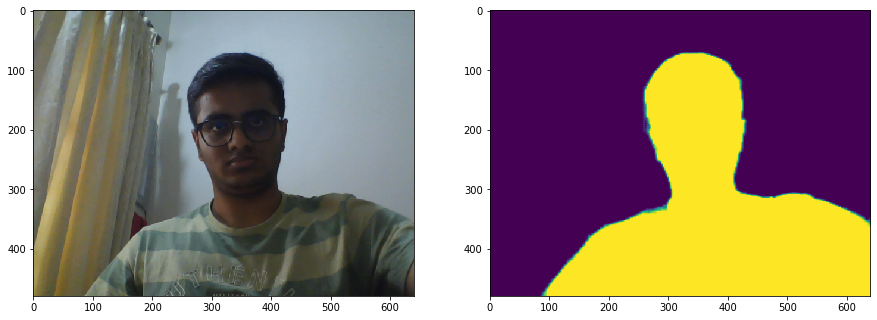

In [24]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup Axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [25]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5

In [26]:
np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [27]:
segmented_image = np.where(mask, frame, background)

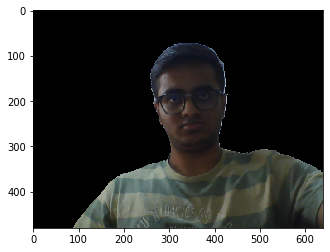

In [28]:
plt.imshow(segmented_image)

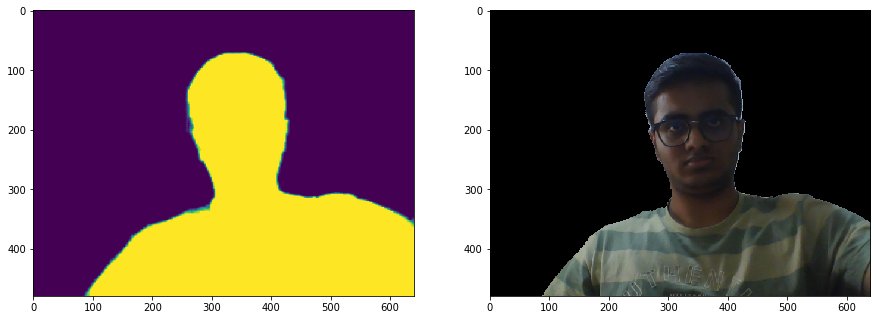

In [29]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [30]:
segmented_image = np.where(mask, frame, cv2.blur(frame, (40,40)))

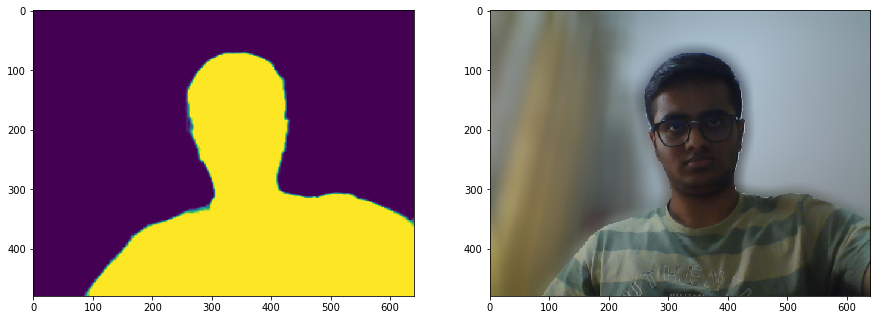

In [31]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

## Building Gradio Web App

In [32]:
import gradio as gr

In [33]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [34]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

In [35]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

In [36]:
webapp.launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)